In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Model, model_from_json
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

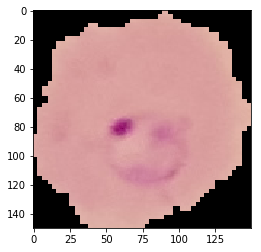

In [2]:
image_file_name = 'img_test.png'
img = image.load_img(image_file_name, target_size=(150, 150))
plt.imshow(img)

In [3]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [4]:
# Načítanie údajov architektúry siete zo súboru json
json_file = open("conv_network.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Vytvorenie modelu založeného na načítaných údajoch
loaded_model = model_from_json(loaded_model_json)
# Načítanie váhy do modelu
loaded_model.load_weights("cnn.h5")

In [5]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [6]:
# Čísla vrstiev konvolucie - 0, 3, 6
activation_model = Model(inputs=loaded_model.input, outputs=loaded_model.layers[0].output)

In [7]:
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [8]:
activation = activation_model.predict(img_array)

In [9]:
print(activation.shape)

(1, 148, 148, 32)


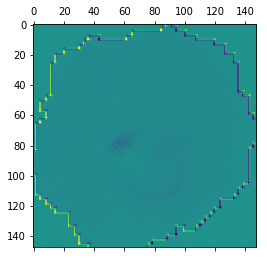

In [10]:
plt.matshow(activation[0, :, :, 18], cmap='viridis')

In [11]:
#množstvo obrázkov v riadku
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

In [12]:
display_grid = np.zeros((n_cols * size, images_per_row * size))

In [13]:
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        #zapis kariet priznakov v display_grid
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

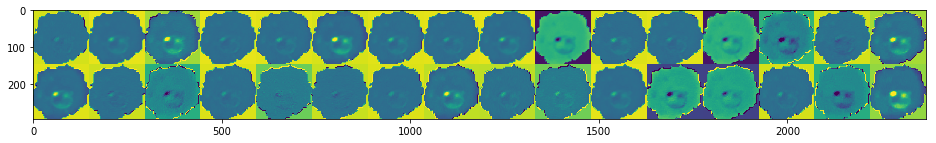

In [14]:
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')